In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Import csv
restaurants3_df = pd.read_csv('yelp_csv/yelp_csv_CLEAN.csv')

In [3]:
restaurants3_df.head()

,Unnamed: 0,name,category,category_title,rating,price,review_count,display_address,address1,address2,address3,city,latitude,longitude,zip code,restaurant_id,price_integer
0,0,Tortas Frontera,mexican,Mexican,4.0,$$,1395,"['Terminal 3 - Gate K4', ""10000 W O'Hare Ave"",...",Terminal 3 - Gate K4,10000 W O'Hare Ave,Terminal 3 Concourse K Gate K4,Chicago,41.975438,-87.900137,60666,1zZvM7Zy__Oh533E4bt6_A,2.0
1,1,Farmer's Fridge,salad,Salad,4.5,$,62,"['10000 Ohare Way', 'Terminal 3 Gate K6', 'Chi...",10000 Ohare Way,NaN,Terminal 3 Gate K6,Chicago,41.975234,-87.898719,60666,4xQv1b1IFRsAWZu7yVLFrQ,1.0
2,2,Tortas Frontera,mexican,Mexican,4.0,$$,1321,"[""10000 W O'Hare Ave"", 'Terminal 1 - Gate B11'...",10000 W O'Hare Ave,NaN,Terminal 1 - Gate B11,Chicago,41.980026,-87.906679,60666,0k018u1PAtfmkNRYk04yCQ,2.0
3,3,Gaslight Club,newamerican,American (New),3.5,$$$,99,"[""Chicago O'Hare International Airport"", ""O'Ha...",Chicago O'Hare International Airport,NaN,O'Hare Hilton Hotel - Lobby Level,Chicago,41.977965,-87.905173,60666,MywzBEKWjmt0bcNajKt8yw,3.0
4,4,Big Bowl,chinese,Chinese,2.0,$$,36,"[""10000 West O'hare Ave"", 'Terminal 5; Gate M7...",10000 West O'hare Ave,NaN,Terminal 5; Gate M7,Chicago,41.975103,-87.891350,60666,6VZwwWxBmxMsKd10AIOjxg,2.0


In [4]:
# Create groupby object by zip code for rating and price_integer
by_zip = restaurants3_df.groupby(['zip code'])[['rating','price_integer']]

In [5]:
# Use describe method for rating and price_integer by zip code
zip_stats = by_zip.describe()
zip_stats

rating                                                    \
          count      mean       std  min    25%   50%    75%  max   
zip code                                                            
60601     133.0  3.413534  0.697700  1.0  3.000  3.50  4.000  5.0   
60602      60.0  3.450000  0.806226  1.0  3.000  3.50  4.000  5.0   
60603      87.0  3.614943  0.738088  1.0  3.500  3.50  4.000  5.0   
60604      45.0  3.544444  0.689386  2.0  3.000  3.50  4.000  5.0   
60605     115.0  3.534783  0.709342  1.5  3.000  3.50  4.000  5.0   
60606     140.0  3.553571  0.726419  1.5  3.000  3.50  4.000  5.0   
60607     256.0  3.652344  0.826186  1.0  3.500  4.00  4.000  5.0   
60608     199.0  3.701005  0.925126  1.0  3.500  4.00  4.500  5.0   
60609      94.0  3.372340  1.109432  1.0  2.500  3.50  4.000  5.0   
60610     153.0  3.558824  0.956180  1.0  3.000  4.00  4.000  5.0   
60611     301.0  3.455150  0.794029  1.0  3.000  3.50  4.000  5.0   
60612      94.0  3.393617  1.116524  1.0  2.500  3.50  4.000  5.0   
60613     153.0  3.676471  0.787381  1.0  3.500  4.00  4.000  5.0   
60614     297.0  3.836700  0.726734  1.0  3.500  4.00  4.500  5.0   
60615      89.0  3.387640  0.824872  1.0  3.000  3.50  4.000  5.0   
60616     224.0  3.524554  0.884888  1.0  3.000  3.50  4.000  5.0   
60617     101.0  3.227723  1.047675  1.0  2.500  3.50  4.000  5.0   
60618     280.0  3.773214  0.981640  1.0  3.500  4.00  4.500  5.0   
60619      95.0  2.889474  1.042141  1.0  2.000  3.00  3.500  5.0   
60620      89.0  2.932584  1.197039  1.0  2.000  3.00  4.000  5.0   
60621      25.0  3.040000  1.040032  1.0  2.500  3.00  4.000  5.0   
60622     253.0  3.867589  0.693834  1.0  3.500  4.00  4.500  5.0   
60623      93.0  3.500000  1.029457  1.0  3.000  3.50  4.500  5.0   
60624      28.0  3.125000  1.385273  1.0  1.875  3.50  4.000  5.0   
60625     203.0  3.805419  0.901220  1.0  3.500  4.00  4.500  5.0   
60626      90.0  3.677778  0.858896  1.0  3.500  4.00  4.500  5.0   
60628      72.0  2.833333  1.201525  1.0  2.000  2.50  4.000  5.0   
60629     121.0  3.235537  1.074466  1.0  2.500  3.50  4.000  5.0   
60630      93.0  3.516129  0.857992  1.0  3.000  3.50  4.000  5.0   
60631      47.0  3.627660  0.594066  2.5  3.000  3.50  4.000  5.0   
60632     164.0  3.359756  1.104298  1.0  2.500  3.50  4.125  5.0   
60633      17.0  3.411765  1.093093  1.0  3.000  3.50  4.000  5.0   
60634     129.0  3.581395  0.949487  1.0  3.000  4.00  4.000  5.0   
60636      36.0  2.291667  1.179437  1.0  1.500  2.00  3.000  5.0   
60637      57.0  3.324561  1.139749  1.0  2.500  3.50  4.000  5.0   
60638     123.0  3.117886  0.964708  1.0  2.500  3.00  4.000  5.0   
60639     173.0  3.332370  1.081393  1.0  2.500  3.50  4.000  5.0   
60640     186.0  3.846774  0.693144  1.5  3.500  4.00  4.500  5.0   
60641     113.0  3.539823  1.043991  1.0  3.000  3.50  4.500  5.0   
60642     112.0  3.839286  0.867881  1.0  3.500  4.00  4.500  5.0   
60643      68.0  3.058824  1.141253  1.0  2.000  3.00  4.000  5.0   
60644      46.0  3.206522  1.077941  1.0  2.500  3.25  3.875  5.0   
60645      44.0  3.625000  1.040600  1.0  3.000  3.75  4.500  5.0   
60646      45.0  3.866667  0.643146  2.0  3.500  4.00  4.500  5.0   
60647     276.0  3.855072  0.745173  1.0  3.500  4.00  4.500  5.0   
60649      54.0  3.138889  1.096378  1.0  2.500  3.00  4.000  5.0   
60651      63.0  3.238095  1.247116  1.0  2.250  3.50  4.000  5.0   
60652      59.0  2.855932  0.933342  1.0  2.250  3.00  3.500  5.0   
60653      53.0  3.254717  1.002989  1.0  2.500  3.50  4.000  4.5   
60654     223.0  3.778027  0.639405  1.0  3.500  4.00  4.000  5.0   
60655      30.0  3.500000  1.008584  1.0  2.625  4.00  4.375  5.0   
60656      28.0  3.321429  0.954660  1.0  3.000  3.50  4.000  5.0   
60657     284.0  3.769366  0.794512  1.0  3.500  4.00  4.125  5.0   
60659     124.0  3.552419  0.866773  1.0  3.000  3.50  4.000  5.0   
60660      88.0  3.732955  0.887165  1.0  3.500  4.00  4.500  5.0   
60661  

In [6]:
# Get average of rating and price_integer by zip code and drop null values 
zip_means = by_zip.mean()
zip_means.dropna(inplace=True)
zip_means

,rating,price_integer
zip code,,
60601,3.413534,1.726415
60602,3.450000,1.553191
60603,3.614943,1.940299
60604,3.544444,1.371429
60605,3.534783,1.717391
60606,3.553571,1.480392
60607,3.652344,1.902174
60608,3.701005,1.446541
60609,3.372340,1.242424


In [7]:
# Define x and y axis 
x_axis = zip_means['price_integer']
y_axis = zip_means['rating']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis,y_axis)
reg_line = slope * x_axis + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
line_eq

'y = 0.59x + 2.52'

Correlation coefficient: 0.43


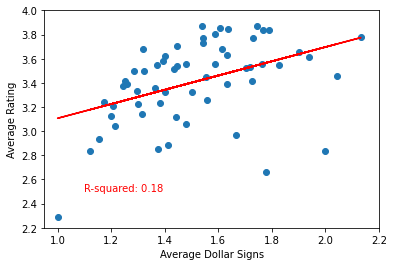

In [16]:
# Perform correlation analysis and print result
corr = st.pearsonr(x_axis,y_axis)
print(f'Correlation coefficient: {round(corr[0],2)}')

# Plot scatterplot and regression line
plt.scatter(x_axis,y_axis);
plt.plot(x_axis,reg_line, color = 'red');
plt.ylabel('Average Rating');
plt.xlabel('Average Dollar Signs');
plt.ylim(2.2,4)
plt.xlim(.95,2.2)
plt.title('')

# Annotate with R^2 value
plt.annotate(f'R-squared: {round((rvalue)**2,2)}',(1.1,2.5),color='red');

In [61]:
# See how many restaurant listings there are by type
by_category = restaurants3_df.groupby(['zip code','category_title'])
restaurants_means = pd.DataFrame(by_category[['rating','price_integer']].mean())
restaurants_counts = pd.DataFrame(by_category[['rating','price_integer']].count())
# restaurants4_df.loc[restaurants4_df['category_title'] > 5]
# restaurants_means.columns
restaurants_means.reset_index(inplace=True)
restaurants_counts.reset_index(inplace=True)
restaurants4_df = pd.merge(restaurants_means,restaurants_counts,on=['zip code','category_title'])

In [73]:
restaurants4_df = restaurants4_df.rename(columns={'rating_x' : 'rating_mean',
                                                 'price_integer_x' : 'price_mean',
                                                 'rating_y' : 'rating_count',
                                                 'price_integer_y' : 'price_count'})
restaurants4_df.dropna(inplace=True)
restaurants4_df = restaurants4_df.loc[(restaurants4_df['rating_count'] > 3) & 
                             (restaurants4_df['price_count'] > 3),:]

In [75]:
restaurants4_df.loc[restaurants4_df['category_title'] == 'Pizza',:]

,zip code,category_title,rating_mean,price_mean,rating_count,price_count
186,60605,Pizza,3.500000,1.909091,14,11
294,60607,Pizza,3.238095,1.625000,21,16
361,60608,Pizza,3.312500,1.142857,8,7
398,60609,Pizza,3.041667,1.111111,12,9
440,60610,Pizza,3.000000,1.700000,14,10
506,60611,Pizza,3.692308,1.916667,13,12
561,60612,Pizza,3.000000,1.000000,6,5
608,60613,Pizza,3.615385,1.700000,13,10
681,60614,Pizza,3.603448,1.650000,29,20
723,60615,Pizza,3.000000,1.571429,7,7
